In [1]:
# coding: utf-8

# our all
import numpy as np
import pandas as pd

# usefull pandas settings
pd.set_option('display.max_rows', 45000)
pd.set_option('display.max_columns', 50000)
pd.set_option('display.max_colwidth', 5000)

# for API working and current time
import requests
import datetime

# chess pgn-reading tool
from pgn_parser import pgn, parser

# multistreaming
import threading

# отключим предупреждения Anaconda
import warnings
warnings.simplefilter('ignore')

# будем отображать графики прямо в jupyter'e
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
user_list=['andreyvict', 'sever043', 'Rosolimo']
user=user_list[2]

In [3]:
user

'Rosolimo'

In [4]:
df=pd.read_csv('data/cur_user.csv')
df=df[df['target_user']==user]

In [5]:
df.sample(4)

,Unnamed: 0,Unnamed: 0.1,rules,time_class,time_control,rated,game,result,date,time,period,white.username,black.username,white.rating,black.rating,white.result,black.result,white.score,black.score,white_elo_forecast,black_elo_forecast,eco,eco_url,game_url,white_url,black_url,target_user,score,rating,opponent_rating,base_elo_forec,color,year,month
8254,228,0,chess,blitz,300,True,1,1-0,2015-12-29,12:23:03,2015-12,Rosolimo,rajasekhar000,1619,1593,win,timeout,1.0,0.0,0.537347,0.462653,E70,https://www.chess.com/openings/E70-Kings-Indian-Defense-Normal-Variation-4.e4-d6,https://www.chess.com/live/game/1402807578,https://api.chess.com/pub/player/rosolimo,https://api.chess.com/pub/player/rajasekhar000,Rosolimo,1.0,1619,1593,0.537347,w,2015,12
10778,85,0,chess,blitz,300,True,1,0-1,2016-08-12,20:54:18,2016-8,quantum9571,Rosolimo,1609,1625,resigned,win,0.0,1.0,0.476990,0.523010,D80,https://www.chess.com/openings/D80-Gruenfeld-Defense-Stockholm-Variation-4...Ne4-5.Nxe4-dxe4,https://www.chess.com/live/game/1688377801,https://api.chess.com/pub/player/quantum9571,https://api.chess.com/pub/player/rosolimo,Rosolimo,1.0,1625,1609,0.523010,b,2016,8
10004,45,0,chess,blitz,300,True,1,1-0,2014-05-11,08:40:19,2014-5,Rosolimo,kaledmskot,1593,1564,win,resigned,1.0,0.0,0.541638,0.458362,D31,https://www.chess.com/openings/D31-Queens-Gambit-Declined-Semi-Slav-Defense-Accelerated-Move-Order-4.Nf3,https://www.chess.com/live/game/803585378,https://api.chess.com/pub/player/rosolimo,https://api.chess.com/pub/player/kaledmskot,Rosolimo,1.0,1593,1564,0.541638,w,2014,5
7794,104,0,chess,blitz,180+2,True,1,1/2-1/2,2019-02-26,19:17:21,2019-2,german1975b,Rosolimo,1570,1507,stalemate,stalemate,0.5,0.5,0.589684,0.410316,B10,https://www.chess.com/openings/B10-Caro-Kann-Defense-2.Nf3-d5,https://www.chess.com/live/game/3491760127,https://api.chess.com/pub/player/german1975b,https://api.chess.com/pub/player/rosolimo,Rosolimo,0.5,1507,1570,0.410316,b,2019,2


In [6]:
# total games played
np.sum(df['game'])

11504

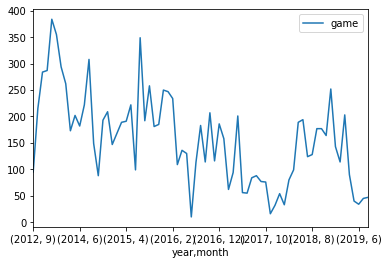

In [7]:
# game mothly dynamic
df.groupby(['year', 'month']).sum()[['game']].plot()

In [8]:
# total oits got
np.sum(df['score'])

5676.5

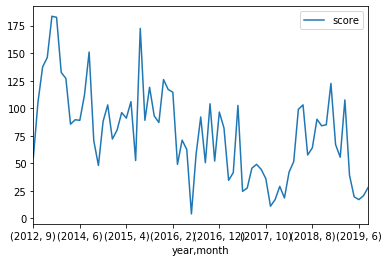

In [9]:
# score mothly dynamic
df.groupby(['year', 'month']).sum()[['score']].plot()

In [10]:
# total effectivity
np.sum(df['score'])/np.sum(df['game'])

0.49343706536856746

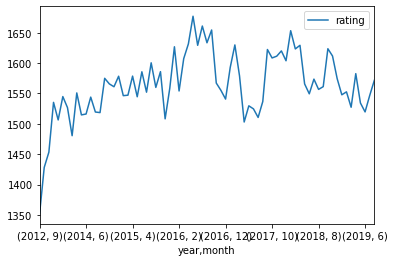

In [11]:
# rating dynamic
df.groupby(['year', 'month']).mean()[['rating']].plot()

In [12]:
# effectivity grouped by colors
cl=df.groupby(['color']).sum()[['game', 'score']].reset_index()
cl['ef']=cl['score']/cl['game']

In [13]:
cl

,color,game,score,ef
0,b,5748,2806.0,0.488170
1,w,5756,2870.5,0.498697


In [14]:
# different game settings
gm=df.groupby(['rules', 'rated', 'time_class', 'time_control']).sum()[['game', 'score']]
gm['ef']=gm['score']/gm['game']

In [15]:
gm

game   score        ef
rules rated time_class time_control                        
chess False blitz      180              2     0.0  0.000000
                       180+2           26     7.5  0.288462
                       300              1     1.0  1.000000
                       300+2            3     1.5  0.500000
                       300+3           10     2.0  0.200000
                       600             29     9.0  0.310345
      True  blitz      180             61    39.5  0.647541
                       180+2         3894  1963.0  0.504109
                       300           7304  3568.0  0.488499
                       300+2            7     1.5  0.214286
                       300+3            4     2.0  0.500000
                       600            156    76.5  0.490385
            bullet     120+1            7     5.0  0.714286

In [16]:
df['elo_dif']=df['rating']-df['opponent_rating']

In [17]:
df.groupby('elo_dif').sum()[['game', 'score']][0:3]

,game,score
elo_dif,,
-745,7,0.0
-724,1,0.0
-653,2,0.0


In [18]:
# game starting distrib 
ec=df.groupby(['color', 'eco', 'eco_url']).sum()[['game', 'score']].reset_index()
ec['ef']=ec['score']/ec['game']
ec=ec.sort_values(by=['color', 'game'], ascending=False)

In [19]:
ec[ec['game']>30]

,color,eco,eco_url,game,score,ef
906,w,D10,https://www.chess.com/openings/D10-Slav-Defense-3.Nc3,438,225.5,0.514840
923,w,D20,https://www.chess.com/openings/D20-Queens-Gambit-Accepted-Old-Variation,373,223.5,0.599196
930,w,D30,https://www.chess.com/openings/D30-Queens-Gambit-Declined,292,143.0,0.489726
952,w,D31,https://www.chess.com/openings/D31-Queens-Gambit-Declined-Semi-Slav-Defense-Accelerated-Move-Order,144,66.0,0.458333
969,w,D35,https://www.chess.com/openings/D35-Queens-Gambit-Declined-Queens-Knight-Variation-3...Nf6,111,61.0,0.549550
932,w,D30,https://www.chess.com/openings/D30-Queens-Gambit-Declined-3.Nf3-Nf6,110,49.5,0.450000
694,w,A40,https://www.chess.com/openings/A40-Queens-Pawn-Opening-Horwitz-Defense-2.c4,99,46.5,0.469697
879,w,D06,https://www.chess.com/openings/D06-Queens-Gambit-Declined-Marshall-Defense,86,50.5,0.587209
810,w,A85,https://www.chess.com/openings/A85-Dutch-Defense-Queens-Knight-Variation,84,40.0,0.476190
683,w,A40,https://www.chess.com/openings/A40-Modern-Defense-with-1-d4-2.c4-Bg7-3.Nc3,83,44.5,0.536145


In [20]:
df=df.sort_values(by=['date', 'time']).reset_index()
df['gamenum']=df.index

In [21]:
def elo_prob(ra, rb):
    return 1/(1+np.power(10, (rb-ra)/400))

def own_elo(ra, rb, score, K):
    return ra+K*(score-elo_prob(ra, rb))

In [22]:
df['own_elo']=1200
df['K']=np.where(df['gamenum']<30,30,5)
df['own_elo']=np.round(df[['rating', 'opponent_rating', 'score', 'K']].apply(lambda x: own_elo(*x), axis=1),0)

In [23]:
df[0:3]

,index,Unnamed: 0,Unnamed: 0.1,rules,time_class,time_control,rated,game,result,date,time,period,white.username,black.username,white.rating,black.rating,white.result,black.result,white.score,black.score,white_elo_forecast,black_elo_forecast,eco,eco_url,game_url,white_url,black_url,target_user,score,rating,opponent_rating,base_elo_forec,color,year,month,elo_dif,gamenum,own_elo,K
0,3184,0,0,chess,blitz,600,True,1,0-1,2012-09-13,12:04:27,2012-9,Rosolimo,Hanzalah76,1016,1142,resigned,win,0.0,1.0,0.326224,0.673776,D06,https://www.chess.com/openings/D06-Queens-Gambit,https://www.chess.com/live/game/361090385,https://api.chess.com/pub/player/rosolimo,https://api.chess.com/pub/player/hanzalah76,Rosolimo,0.0,1016,1142,0.326224,w,2012,9,-126,0,1006.0,30
1,3185,1,0,chess,blitz,600,True,1,1-0,2012-09-13,12:14:18,2012-9,Hanzalah76,Rosolimo,1147,918,win,checkmated,1.0,0.0,0.788887,0.211113,B20,https://www.chess.com/openings/B20-Sicilian-Defense-2.d3-Nc6,https://www.chess.com/live/game/361093887,https://api.chess.com/pub/player/hanzalah76,https://api.chess.com/pub/player/rosolimo,Rosolimo,0.0,918,1147,0.211113,b,2012,9,-229,1,912.0,30
2,3186,2,0,chess,blitz,600,True,1,1-0,2012-09-13,12:34:24,2012-9,Rosolimo,Hanzalah76,1085,1134,win,checkmated,1.0,0.0,0.429947,0.570053,D20,https://www.chess.com/openings/D20-Queens-Gambit-Accepted-Old-Variation,https://www.chess.com/live/game/361102676,https://api.chess.com/pub/player/rosolimo,https://api.chess.com/pub/player/hanzalah76,Rosolimo,1.0,1085,1134,0.429947,w,2012,9,-49,2,1102.0,30


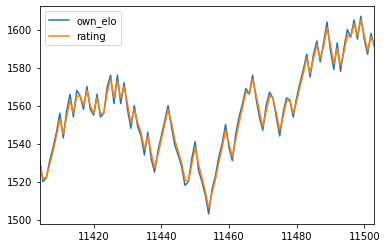

In [24]:
df[['own_elo', 'rating']][-100:].plot()

In [25]:
work_df=df[df['rated']==True]
work_df=work_df[['date', 'time', 'color', 'score', 'rating', 'opponent_rating', 'eco']]
work_df['datetime']=work_df['date']+' '+work_df['time']

work_df['datetime'] = work_df['datetime'].astype('datetime64[ns]')
work_df['year']=work_df['datetime'].dt.year
work_df['month']=work_df['datetime'].dt.month
work_df['week']=work_df['datetime'].dt.week
work_df['day']=work_df['datetime'].dt.day
work_df['weekday']=work_df['datetime'].dt.weekday
work_df['hour']=work_df['datetime'].dt.hour
work_df['weekend']=np.where((work_df['weekday']==6)|(work_df['weekday']==0),1,0)
work_df['is_night']=np.where((work_df['hour']>1)&(work_df['hour']<9),1,0)

c=pd.get_dummies(work_df['color'])
eco=pd.get_dummies(work_df['eco'])
work_df=pd.concat([work_df, c, eco], axis=1)




work_df=work_df.drop(columns=['time', 'datetime', 'color', 'eco'])

In [26]:
len(work_df)

11433

In [27]:
work_df.sample(3)

,date,score,rating,opponent_rating,year,month,week,day,weekday,hour,weekend,is_night,b,w,A00,A01,A02,A03,A04,A06,A07,A08,A09,A10,A11,A13,A15,A16,A17,A20,A21,A22,A25,A28,A30,A31,A32,A33,A34,A35,A36,A40,A41,A42,A43,A44,A45,A46,A48,A49,A50,A51,A52,A53,A54,A56,A57,A58,A60,A65,A70,A80,A84,A85,B00,B01,B02,B03,B06,B07,B08,B09,B10,B11,B12,B13,B14,B15,B16,B17,B18,B19,B20,B21,B22,B23,B30,B33,B34,B40,B44,B45,B50,B52,B54,C00,C01,C02,C08,C10,C11,C14,C15,C20,C26,C31,C34,C41,C42,C44,C46,C61,C62,C63,C64,C66,C70,C77,D00,D01,D02,D03,D04,D06,D07,D08,D10,D11,D13,D15,D16,D20,D21,D30,D31,D32,D35,D37,D38,D40,D41,D43,D44,D45,D46,D48,D50,D51,D52,D53,D55,D60,D70,D72,D73,D77,D78,D80,D81,D82,D83,D84,D85,D86,D87,D90,D91,D92,D93,D94,D95,D96,D97,D98,E00,E10,E11,E12,E14,E15,E16,E17,E18,E19,E20,E21,E32,E33,E34,E38,E40,E41,E43,E60,E61,E62,E70,E76,E80,E90,E91,E92,E93,E94,Unknown
10717,2018-12-22,1.0,1532,1529,2018,12,51,22,5,18,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2667,2014-06-21,1.0,1514,1468,2014,6,25,21,5,17,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5579,2015-09-16,1.0,1591,1547,2015,9,38,16,2,7,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [49]:
hold=work_df[work_df['date']>='2019-08-01']
X=work_df[work_df['date']<'2019-08-01']
y=X['score']
X=X.drop(columns=['score', 'date'])

X=X.astype('int')

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
     X.values, y.values, test_size=0.25, random_state=42)

In [51]:
X.sample(3)

,rating,opponent_rating,year,month,week,day,weekday,hour,weekend,is_night,b,w,A00,A01,A02,A03,A04,A06,A07,A08,A09,A10,A11,A13,A15,A16,A17,A20,A21,A22,A25,A28,A30,A31,A32,A33,A34,A35,A36,A40,A41,A42,A43,A44,A45,A46,A48,A49,A50,A51,A52,A53,A54,A56,A57,A58,A60,A65,A70,A80,A84,A85,B00,B01,B02,B03,B06,B07,B08,B09,B10,B11,B12,B13,B14,B15,B16,B17,B18,B19,B20,B21,B22,B23,B30,B33,B34,B40,B44,B45,B50,B52,B54,C00,C01,C02,C08,C10,C11,C14,C15,C20,C26,C31,C34,C41,C42,C44,C46,C61,C62,C63,C64,C66,C70,C77,D00,D01,D02,D03,D04,D06,D07,D08,D10,D11,D13,D15,D16,D20,D21,D30,D31,D32,D35,D37,D38,D40,D41,D43,D44,D45,D46,D48,D50,D51,D52,D53,D55,D60,D70,D72,D73,D77,D78,D80,D81,D82,D83,D84,D85,D86,D87,D90,D91,D92,D93,D94,D95,D96,D97,D98,E00,E10,E11,E12,E14,E15,E16,E17,E18,E19,E20,E21,E32,E33,E34,E38,E40,E41,E43,E60,E61,E62,E70,E76,E80,E90,E91,E92,E93,E94,Unknown
1455,1527,1561,2014,1,3,17,4,13,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6338,1667,1700,2016,1,1,4,0,8,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1409,1555,1531,2014,1,3,14,1,17,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [52]:
X_train.shape

(8539, 203)

In [53]:
X_test.shape

(2847, 203)

In [54]:
# строит график, считает метрики
def check(df, x, y1, y2, title):
    from sklearn.metrics import mean_squared_error
    print(title)
    df[[x, y1, y2]].set_index(x).plot(title=title)
    
    print('correlation: ', np.corrcoef(df[y1], df[y2])[0][1])
    
    print('stdev: ', mean_squared_error(df[y1], df[y2]))

In [92]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(X_train, y_train)
lr_pred=lr.predict(X_test)

print('R^2 train:', lr.score(X_train, y_train))
print('R^2 test:', lr.score(X_test, y_test))
print('Total: ', np.sum(y_test))
print('Total: ', np.sum(lr.predict(X_test)))
print('MAE train', mean_absolute_error(lr.predict(X_train), y_train))
print('MAE test', mean_absolute_error(lr.predict(X_test), y_test))

# plt.plot(range(len(y_test)), y_test, lr.predict(X_test))

R^2 train: 0.15306268817983282
R^2 test: -574032251868237.2
Total:  1393.0
Total:  -2096561421.0489693
MAE train 0.409590727273021
MAE test 736411.6523407875


In [91]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial').fit(X_train, y_train)

lr_pred=lr.predict(X_test)

print('R^2 train:', lr.score(X_train, y_train))
print('R^2 test:', lr.score(X_test, y_test))
print('Total: ', np.sum(y_test))
print('Total: ', np.sum(lr.predict(X_test)))
print('MAE train', mean_absolute_error(lr.predict(X_train), y_train))
print('MAE test', mean_absolute_error(lr.predict(X_test), y_test))

# plt.plot(range(len(y_test)), y_test, lr.predict(X_test))

ValueError: Unknown label type: 'continuous'

In [86]:
import xgboost
from sklearn.metrics import mean_absolute_error, mean_squared_error
xgb = xgboost.XGBRegressor()
xgb.fit(X_train, y_train)
print('R^2 train:', xgb.score(X_train, y_train))
print('R^2 test:', xgb.score(X_test, y_test))
print('Total: ', np.sum(y_test))
print('Total: ', np.sum(xgb.predict(X_test)))
print('MAE train', mean_absolute_error(xgb.predict(X_train), y_train))
print('MAE test', mean_absolute_error(xgb.predict(X_test), y_test))

[23:33:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R^2 train: 0.22149439754449451
R^2 test: 0.19009682492446356
Total:  1393.0
Total:  1381.0457
MAE train 0.38845559006022656
MAE test 0.3954739360316075


In [ ]:
xgb_model_abs_testing = list()
xgb_model_abs_training = list()
rng = np.arange(1,151)
for i in rng:
    xgb = xgboost.XGBRegressor(n_estimators=i)
    xgb.fit(X_train, y_train)
    xgb.score(X_test, y_test)
    xgb_model_abs_testing.append(mean_absolute_error(xgb.predict(X_test), y_test))
    xgb_model_abs_training.append(mean_absolute_error(xgb.predict(X_train), y_train))
    
find_df=pd.DataFrame(np.arange(1,151), columns=['n_estimators']).set_index('n_estimators')
find_df['xgb_model_abs_testing_MAE']=xgb_model_abs_testing
find_df['xgb_model_abs_training_MAE']=xgb_model_abs_training

find_df.plot()

stat_best_n_estimators=np.argmin(find_df['xgb_model_abs_testing_MAE'])
ch_n_estimators=stat_best_n_estimators

In [105]:
xgb_model_abs_testing = list()
xgb_model_abs_training = list()
rng = np.arange(0.05, 0.65, 0.05)
for i in rng:
    xgb = xgboost.XGBRegressor(n_estimators=ch_n_estimators, random_state=17, learning_rate=i)
    xgb.fit(X_train, y_train)
    xgb.score(X_test, y_test)
    xgb_model_abs_testing.append(mean_absolute_error(xgb.predict(X_test), y_test))
    xgb_model_abs_training.append(mean_absolute_error(xgb.predict(X_train), y_train))
    
find_df=pd.DataFrame(rng, columns=['learning_rate']).set_index('learning_rate')
find_df['xgb_model_abs_testing_MAE']=xgb_model_abs_testing
find_df['xgb_model_abs_training_MAE']=xgb_model_abs_training

find_df.plot()

stat_best_learning_rate=np.argmin(find_df['xgb_model_abs_testing_MAE'])
ch_learning_rate=0.15

[00:06:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:06:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:06:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:06:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:06:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:06:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:06:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:06:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

ValueError: Length of values does not match length of index

[00:19:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:19:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:19:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:20:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:20:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:20:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:20:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:20:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

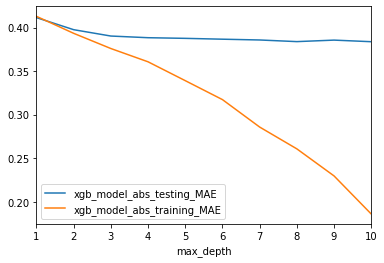

In [117]:
xgb_model_abs_testing = list()
xgb_model_abs_training = list()
rng = np.arange(1, 11)
for i in rng:
    xgb = xgboost.XGBRegressor(n_estimators=ch_n_estimators, random_state=17, learning_rate=ch_learning_rate, max_depth=i)
    xgb.fit(X_train, y_train)
    xgb.score(X_test, y_test)
    xgb_model_abs_testing.append(mean_absolute_error(xgb.predict(X_test), y_test))
    xgb_model_abs_training.append(mean_absolute_error(xgb.predict(X_train), y_train))
    
find_df=pd.DataFrame(rng, columns=['max_depth']).set_index('max_depth')
find_df['xgb_model_abs_testing_MAE']=xgb_model_abs_testing
find_df['xgb_model_abs_training_MAE']=xgb_model_abs_training

find_df.plot()

stat_best_max_depth=np.argmin(find_df['xgb_model_abs_testing_MAE'])
ch_max_depth=2

In [120]:
ch_max_depth=2

In [122]:
import xgboost
from sklearn.metrics import mean_absolute_error, mean_squared_error
xgb = xgboost.XGBRegressor(n_estimators=ch_n_estimators, random_state=17, learning_rate=ch_learning_rate, max_depth=ch_max_depth)
xgb.fit(X_train, y_train)
print('R^2 train:', xgb.score(X_train, y_train))
print('R^2 test:', xgb.score(X_test, y_test))
print('Total: ', np.sum(y_test))
print('Total: ', np.sum(xgb.predict(X_test)))
print('MAE train', mean_absolute_error(xgb.predict(X_train), y_train))
print('MAE test', mean_absolute_error(xgb.predict(X_test), y_test))

[00:28:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R^2 train: 0.20717127832527393
R^2 test: 0.18509732844815197
Total:  1393.0
Total:  1381.5818
MAE train 0.39347833822546663
MAE test 0.3976592982929131


In [123]:
res_test=pd.DataFrame(X_test, columns=X.columns)
res_test['fact']=y_test
res_test['predict']=xgb.predict(X_test)


sh=res_test.sample(150).reset_index()
sh['ind']=sh.index

In [124]:
res_test.sample(3)

,rating,opponent_rating,year,month,week,day,weekday,hour,weekend,is_night,b,w,A00,A01,A02,A03,A04,A06,A07,A08,A09,A10,A11,A13,A15,A16,A17,A20,A21,A22,A25,A28,A30,A31,A32,A33,A34,A35,A36,A40,A41,A42,A43,A44,A45,A46,A48,A49,A50,A51,A52,A53,A54,A56,A57,A58,A60,A65,A70,A80,A84,A85,B00,B01,B02,B03,B06,B07,B08,B09,B10,B11,B12,B13,B14,B15,B16,B17,B18,B19,B20,B21,B22,B23,B30,B33,B34,B40,B44,B45,B50,B52,B54,C00,C01,C02,C08,C10,C11,C14,C15,C20,C26,C31,C34,C41,C42,C44,C46,C61,C62,C63,C64,C66,C70,C77,D00,D01,D02,D03,D04,D06,D07,D08,D10,D11,D13,D15,D16,D20,D21,D30,D31,D32,D35,D37,D38,D40,D41,D43,D44,D45,D46,D48,D50,D51,D52,D53,D55,D60,D70,D72,D73,D77,D78,D80,D81,D82,D83,D84,D85,D86,D87,D90,D91,D92,D93,D94,D95,D96,D97,D98,E00,E10,E11,E12,E14,E15,E16,E17,E18,E19,E20,E21,E32,E33,E34,E38,E40,E41,E43,E60,E61,E62,E70,E76,E80,E90,E91,E92,E93,E94,Unknown,fact,predict
668,1631,1591,2016,1,4,29,4,9,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.5,0.612712
1393,1629,1671,2018,12,49,9,6,9,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.385143
1887,1507,1484,2014,8,33,16,5,17,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.653419


gg
correlation:  0.3235967243189679
stdev:  0.20347846086309718


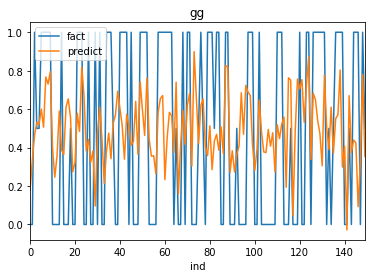

In [125]:
check(sh, 'ind', 'fact', 'predict', 'gg')

In [126]:
features_df = pd.DataFrame(data=xgb.feature_importances_.reshape(1, -1), columns=X.columns).sort_values(axis=1, by=[0], ascending=False).T

In [127]:
features_df

,0
opponent_rating,0.174251
rating,0.156435
E61,0.036569
year,0.027160
week,0.022224
E10,0.021495
B15,0.020792
hour,0.020759
B22,0.020501
month,0.019782


In [131]:
res_test.groupby('month').mean()[['fact']]

,fact
month,
1,0.525455
2,0.469027
3,0.470833
4,0.508969
5,0.535211
6,0.478873
7,0.460648
8,0.470954
9,0.474074


In [133]:
res_test.groupby('hour').mean()[['fact']]

,fact
hour,
0,0.500000
4,0.500000
5,0.000000
6,0.451613
7,0.494898
8,0.462687
9,0.549107
10,0.548837
11,0.524242
